# Problem Set 2

## 1

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as sts
from scipy import integrate

In [107]:
incomes = pd.read_csv("incomes.txt", header = None)
incomes.rename(columns={0: 'Income'}, inplace=True)

(a) Plot a histogram of percentages of the income.txt data with 30 bins.

<IPython.core.display.Javascript object>


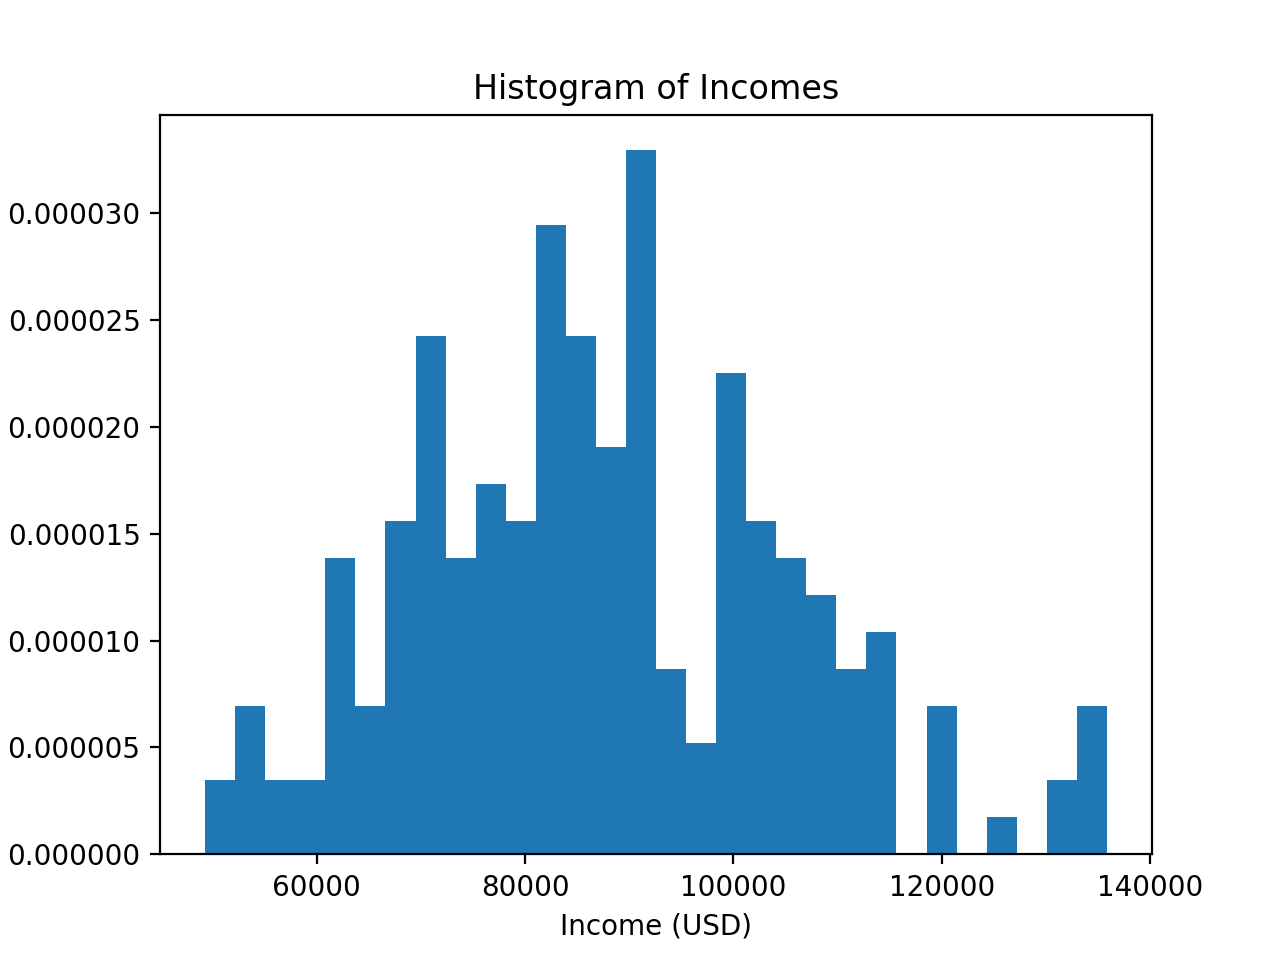

In [113]:
plt.hist(incomes["Income"], bins = 30, normed=True)
plt.ylabel("Normed Count")
plt.xlabel("Income (USD)")
plt.title("Histogram of Incomes")
plt.show()

(b) Plot the lognormal PDF f(x|μ = 11.0,σ = 0.5) for 0 ≤ x ≤ 150,000.

First we define a function simulates a log normal pdf with mean mu and variance sigma^2.  
Inputs:    
    x: vector (array), log normally dist. rand var；  
    mu: scalar, log normal mean；  
    sigma: scalar > 0, std. dev. of log normal；    
Outputs:
    value of pdf；

In [114]:
def log_norm(x, mu, sigma):
    val = ((1/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-(((np.log(x)-mu)**2)/(2*(sigma**2)))))
    return val

<IPython.core.display.Javascript object>


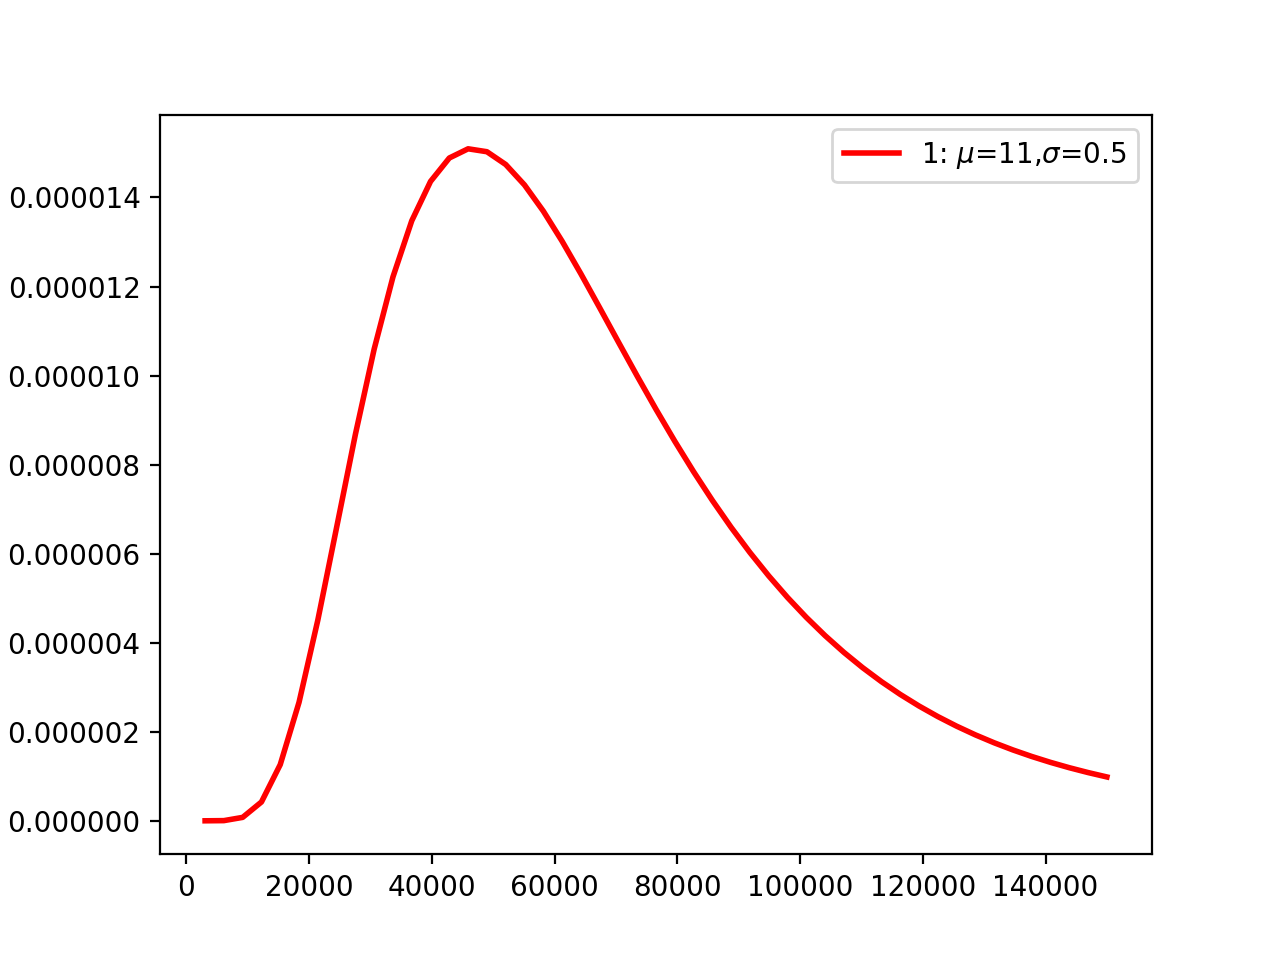

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [124]:
plt.clf()
x = np.linspace(0,150000)
plt.plot(x, log_norm(x, 11, 0.5),
         linewidth=2, color='r', label='1: $\mu$=11,$\sigma$=0.5')
plt.legend()
plt.show()


The next function simulates a log normal pdf with mean mu and variance sigma^2.  
Inputs:  
    x: vector (array), log normally dist. rand var  
    mu: scalar, log normal mean  
    sigma: scalar > 0, std. dev. of log normal  
Outputs:  
    value of pdf

In [125]:
def log_like_LN(x, mu, sigma):
    vals = log_norm(x, mu, sigma)
    log_vals = np.log(vals)
    
    return log_vals.sum()

In [126]:
log_like_LN(incomes["Income"], 11, 0.5)

-2385.856997808559

(c): Estimate the lognormal parameters and plot this function against the previous PDF from (b) and histogram for (a).

In [127]:
def max_lik(x, parameters):
    def criterion(parameters):
        mu, sigma = parameters
        return -log_like_LN(x, mu, sigma)
    # to ensure sigma > 0, if 0 then divide by zero error
    return minimize(criterion, parameters, method='L-BFGS-B', bounds = ((None, None), (0.0001, None)))

In [128]:
res = max_lik(incomes["Income"], np.array([11, 0.5]))
-res.fun

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


-2285.8999332477283

In [129]:
res.x

array([ 11.49501608,   0.31087915])

The log liklihood is $-2285.719$ with a mean of $11.459$ and a std. dev. of $0.31$. The variance covariance matrix is as follows:

In [130]:
OffDiagNeg = np.array([[1, -1], [-1, 1]]) 
vcv = res.hess_inv.todense()*OffDiagNeg
print('VCV = ', vcv)

VCV =  [[  4.59466083e-04   6.65458035e-05]
 [  6.65458035e-05   1.71221040e-03]]


<IPython.core.display.Javascript object>


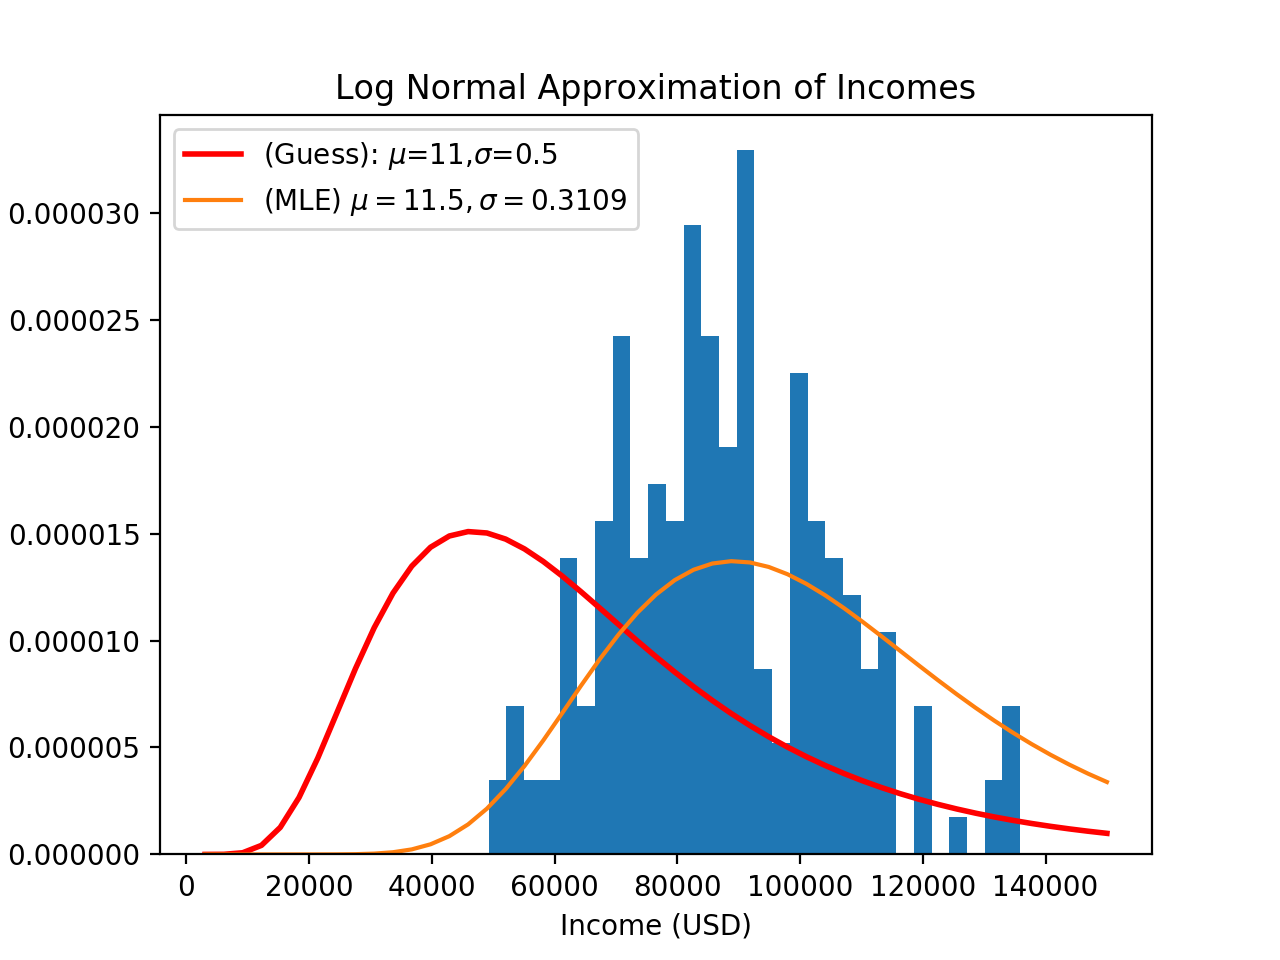

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [131]:
plt.clf()
plt.hist(incomes["Income"], bins = 30, normed=True)
plt.ylabel("Normed Count")
plt.xlabel("Income (USD)")
plt.title("Log Normal Approximation of Incomes")
x = np.linspace(0,150000)
plt.plot(x, log_norm(x, 11, 0.5),
         linewidth=2, color='r', label='(Guess): $\mu$=11,$\sigma$=0.5')
plt.plot(x, log_norm(x, res.x[0], res.x[1]), 
         label = "(MLE) $\mu = {}, \sigma = {}$".format(res.x[0].round(2), 
                                                        res.x[1].round(4)))
plt.legend()
plt.show()

In [123]:
h0 = log_like_LN(incomes['Income'], 11, 0.5)
mle = log_like_LN(incomes['Income'], res.x[0], res.x[1])
ratio = 2 * (mle - h0)
p = 1.0 - sts.chi2.cdf(ratio, 2)
print('P-Value = ', p)

P-Value =  0.0


we can reject the null

(e) Calculate the probobility of earning more than \$100,000 and probobility of earning less than $75,000.

In [103]:
def cdf_LN(x, mu, sigma):
    return integrate.quad(lambda x: log_norm(x, mu, sigma), 0, x)

print("Probability of earning $100,000 or more:", (1-cdf_LN(100000, res.x[0], res.x[1])[0]))
print("Probability of earning $75,000 or less:", (cdf_LN(75000, res.x[0], res.x[1])[0]))

Probability of earning $100,000 or more: 0.4770301065468412
Probability of earning $75,000 or less: 0.19275917149499472


## 2

In [104]:
data =  pd.read_csv('sick.txt')
plt.hist(data.sick)
data.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [105]:
def get_error_sum(params,var_list):
    age, children, winter, sick= var_list
    b0, b1, b2, b3, sigma = params
#     print(np.sum((sick-b0-b1*age-b2*children-b3*winter)**2))
    return np.sum((sick-b0-b1*age-b2*children-b3*winter)**2)
def crit(params,*args):
    age, children, winter, sick= args
    b0, b1, b2, b3, sigma = params
    n=len(age)
    log_lik_val = -n/2*np.log(2*np.pi)-n*np.log(sigma)-1/(2*sigma**2)*get_error_sum(params,(age, children, winter, sick))
    return -log_lik_val
age = data.age
children = data.children
winter = data.avgtemp_winter
sick = data.sick
params_init = (1,0,0,0,1)
# print(crit(params_init,age, children, winter,sick))
results = minimize(crit, params_init, args=((age, children, winter, sick)),  method = 'L-BFGS-B',bounds=((0.1, None),\
                       (0.01, None), (0.1, None), (None, -0.001), (0.001, None)))
print (f'The estimatesa are {results.x} for b0, b1, b2, b3 and sigma')
print (f'The log likelihood is {crit(params_init,age, children, winter,sick)}.')

The estimatesa are [ 0.25164402  0.01293342  0.40050153 -0.00999167  0.00301775] for b0, b1, b2, b3 and sigma
The log likelihood is 209.09200664093453.


In [132]:
OffDiagNeg = np.eye(5)*2-1
vcv_mle = results.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[   37.1317357     20.99796367  -231.00136221    -9.07659102
    -12.40897315]
 [   20.99796367    11.88042641   130.69448735     5.13568557
      7.02075423]
 [ -231.00136221   130.69448735  1437.74933156   -56.49662859
    -77.23417581]
 [   -9.07659102     5.13568557   -56.49662859     2.22007052
     -3.03493514]
 [  -12.40897315     7.02075423   -77.23417581    -3.03493514
      4.14895927]]
Standard error for mu estimate =  6.09358151695
Standard error for sigma estimate =  3.44679944391


In [133]:
results.fun

-876.86506423927983

In [134]:
params_h0 = np.array([1,0,0,0,0.1])
log_lik_h0 = -crit(params_h0, age, children, winter,sick)
log_lik_mle = -crit(results.x, age, children, winter,sick)
pval_h0 = 1.0 - sts.chi2.cdf(2 * (log_lik_mle - log_lik_h0), 5)
print('The p_value is {}. Hypothesis is rejected.'.format(pval_h0))

The p_value is 0.0. Hypothesis is rejected.
